# Data For All Wells in Utah

In [1]:
import dataretrieval.nwis as nwis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import folium
import mplleaflet
from selenium import webdriver
from tqdm.notebook import tqdm
from folium.plugins import MarkerCluster

import os as os #file directory handling package
from scipy.stats import linregress #used for linear regression
import scipy.stats as scs
import scipy as sc #scientific python
import statsmodels.api as sm #used for statistical modeling
import seaborn as sns #a fancy plotting package (good for quick and exploratory plotting, not as good for analysis)
import matplotlib.gridspec as gridspec #used to create complex multi panel plots
import geopandas as gpd

In [2]:
df = nwis.get_info(stateCd = 'UT')  
dfsites = df[0]
dfsites

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,09163527,"WEST BITTER CREEK NEAR HARLEY DOME, UTAH",ST,392035.0,1090848.0,39.343032,-109.147336,M,F,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USGS,09163530,COLORADO RIVER BELOW COLORADO-UTAH STATE LINE,ST,390518.0,1090601.0,39.088317,-109.100945,M,F,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USGS,09163550,"HARLEY DOME WASH NEAR HARLEY DOME, UTAH",ST,390925.0,1090840.0,39.156927,-109.145114,M,F,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USGS,09163675,"COTTONWOOD WASH AT I-70, NEAR CISCO, UTAH",ST,390454.0,1091301.0,39.081652,-109.217615,M,F,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USGS,09163700,"CISCO WASH NEAR CISCO, UTAH",ST,385750.0,1092010.0,38.963873,-109.336784,M,F,...,Y,NaN,NNNNNNNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32699,USGS,415956112525201,(B-15- 9)28cbc- 1,GW,415956.0,1125252.0,41.998808,-112.881929,M,S,...,Y,C,YNNNNNNN,NaN,100VLFL,NaN,400.0,NaN,O,NaN
32700,USGS,415956112532501,(B-15- 9)29dbc- 1,GW,415956.0,1125325.0,41.998808,-112.891096,M,S,...,Y,C,YNNNNNNN,NaN,100VLFL,NaN,480.0,NaN,O,NaN
32701,USGS,415957112411001,(B-15- 7)30cbc- 1,GW,415957.0,1124110.0,41.999086,-112.686923,M,S,...,Y,C,YNNNNNNN,NaN,NaN,NaN,228.0,NaN,NaN,NaN
32702,USGS,415958111242901,(A-15- 5)32dbb- 1,GW,415958.0,1112429.0,41.999377,-111.408818,M,T,...,Y,U,NYNNNNNN,NaN,NaN,NaN,191.0,191.0,NaN,NaN


In [3]:
#selecting only the groundwater sites
dfsitesGW = dfsites[dfsites["site_tp_cd"] == "GW"]
dfsitesGW

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
993,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,Y,C,NNNNNNNN,N300COPLTS,310DCLL,U,120.0,120.0,R,474923900
994,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,Y,C,YNNNNYNN,NaN,NaN,NaN,14.0,NaN,NaN,NaN
995,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,Y,C,YYYYNNNN,NaN,111ALVM,NaN,84.0,84.0,NaN,KAN
996,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,Y,C,Y Y,NaN,227GLNC,X,NaN,NaN,NaN,971600203
1000,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,Y,C,YYNNNYNN,NaN,NaN,NaN,800.0,800.0,D,464900200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32699,USGS,415956112525201,(B-15- 9)28cbc- 1,GW,415956.0,1125252.0,41.998808,-112.881929,M,S,...,Y,C,YNNNNNNN,NaN,100VLFL,NaN,400.0,NaN,O,NaN
32700,USGS,415956112532501,(B-15- 9)29dbc- 1,GW,415956.0,1125325.0,41.998808,-112.891096,M,S,...,Y,C,YNNNNNNN,NaN,100VLFL,NaN,480.0,NaN,O,NaN
32701,USGS,415957112411001,(B-15- 7)30cbc- 1,GW,415957.0,1124110.0,41.999086,-112.686923,M,S,...,Y,C,YNNNNNNN,NaN,NaN,NaN,228.0,NaN,NaN,NaN
32702,USGS,415958111242901,(A-15- 5)32dbb- 1,GW,415958.0,1112429.0,41.999377,-111.408818,M,T,...,Y,U,NYNNNNNN,NaN,NaN,NaN,191.0,191.0,NaN,NaN


In [4]:
# here I am dropping all the dupliats based on site ID. inplace is used to replace the dataframe:
dfsitesGW.drop_duplicates(subset=['site_no'], keep='first', inplace = True)


# in all cases, I am dropping all the sites that have no coordinates
dfsitesGW.dropna(subset=['dec_lat_va', 'dec_long_va'], inplace=True)

dfsitesGW

C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\2988894916.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsitesGW.drop_duplicates(subset=['site_no'], keep='first', inplace = True)
C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\2988894916.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsitesGW.dropna(subset=['dec_lat_va', 'dec_long_va'], inplace=True)


,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
993,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,Y,C,NNNNNNNN,N300COPLTS,310DCLL,U,120.0,120.0,R,474923900
994,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,Y,C,YNNNNYNN,NaN,NaN,NaN,14.0,NaN,NaN,NaN
995,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,Y,C,YYYYNNNN,NaN,111ALVM,NaN,84.0,84.0,NaN,KAN
996,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,Y,C,Y Y,NaN,227GLNC,X,NaN,NaN,NaN,971600203
1000,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,Y,C,YYNNNYNN,NaN,NaN,NaN,800.0,800.0,D,464900200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32699,USGS,415956112525201,(B-15- 9)28cbc- 1,GW,415956.0,1125252.0,41.998808,-112.881929,M,S,...,Y,C,YNNNNNNN,NaN,100VLFL,NaN,400.0,NaN,O,NaN
32700,USGS,415956112532501,(B-15- 9)29dbc- 1,GW,415956.0,1125325.0,41.998808,-112.891096,M,S,...,Y,C,YNNNNNNN,NaN,100VLFL,NaN,480.0,NaN,O,NaN
32701,USGS,415957112411001,(B-15- 7)30cbc- 1,GW,415957.0,1124110.0,41.999086,-112.686923,M,S,...,Y,C,YNNNNNNN,NaN,NaN,NaN,228.0,NaN,NaN,NaN
32702,USGS,415958111242901,(A-15- 5)32dbb- 1,GW,415958.0,1112429.0,41.999377,-111.408818,M,T,...,Y,U,NYNNNNNN,NaN,NaN,NaN,191.0,191.0,NaN,NaN


In [5]:
#minimizing the data to work with a small dataset
new_df = dfsitesGW.iloc[:30]
new_df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
993,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,Y,C,NNNNNNNN,N300COPLTS,310DCLL,U,120.0,120.0,R,474923900
994,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,Y,C,YNNNNYNN,NaN,NaN,NaN,14.0,NaN,NaN,NaN
995,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,Y,C,YYYYNNNN,NaN,111ALVM,NaN,84.0,84.0,NaN,KAN
996,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,Y,C,Y Y,NaN,227GLNC,X,NaN,NaN,NaN,971600203
1000,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,Y,C,YYNNNYNN,NaN,NaN,NaN,800.0,800.0,D,464900200
1001,USGS,370010113002001,(C-43-10)32dca-1,GW,370010.0,1130020.0,37.002778,-113.005556,U,U,...,Y,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018PSSWUD
1003,USGS,370017113002001,(C-43-10)32dba-1,GW,370017.0,1130020.0,37.004722,-113.005556,U,U,...,Y,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018PSSWUD
1006,USGS,370021110174201,(D-43-15)31acc- 1,GW,370021.0,1101742.0,37.005833,-110.295688,M,S,...,Y,C,YNNNNNNN,NaN,310DCLL,U,225.0,225.0,O,474923900
1008,USGS,370026110173801,(D-43-15)31aca- 1,GW,370026.0,1101738.0,37.007222,-110.294576,M,S,...,Y,C,YYNYNNNN,NaN,111ALVM,U,50.0,60.0,D,474923900
1011,USGS,370033111374701,(D-44- 3) 6cac-1,GW,370033.0,1113747.0,37.009167,-111.629722,U,U,...,Y,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018PSSWUD


In [6]:
#calling all data from all sites obtained from the new_df
wellsDf = nwis.get_record(sites= new_df['site_no'], service='gwlevels', start = '1800-01-01') # select all  groundwater level data above 1800
wellsDf.head()
# use the tool to reset index from here immediately

C:\Users\jihad\anaconda3\lib\site-packages\dataretrieval\utils.py:86: UserWarning: Warning: 1802 incomplete dates found, consider setting datetime_index to False.
  warnings.warn(


agency_cd site_tp_cd      lev_dt  \
site_no         datetime                                                     
370000113273301 NaN                            USGS         GW  1968-10-10   
                NaN                            USGS         GW  1970-07-29   
370006111300401 2007-03-14 14:39:00+00:00      USGS         GW  2007-03-14   
                2008-03-20 15:09:00+00:00      USGS         GW  2008-03-20   
                2010-03-24 14:53:00+00:00      USGS         GW  2010-03-24   

                                          lev_tm lev_tz_cd  lev_va  sl_lev_va  \
site_no         datetime                                                        
370000113273301 NaN                          NaN     +0000   12.00        NaN   
                NaN                          NaN     +0000   12.77        NaN   
370006111300401 2007-03-14 14:39:00+00:00  14:39     +0000  110.11        NaN   
                2008-03-20 15:09:00+00:00  15:09     +0000  110.39        NaN   
                2010-03-24 14:53:00+00:00  14:53     +0000  105.39        NaN   

                                           sl_datum_cd lev_status_cd  \
site_no         datetime                                               
370000113273301 NaN                                NaN             1   
                NaN                                NaN             1   
370006111300401 2007-03-14 14:39:00+00:00          NaN             1   
                2008-03-20 15:09:00+00:00          NaN             1   
                2010-03-24 14:53:00+00:00          NaN             1   

                                          lev_agency_cd lev_dt_acy_cd  \
site_no         datetime                                                
370000113273301 NaN                                 NaN             D   
                NaN                                 NaN             D   
370006111300401 2007-03-14 14:39:00+00:00          USGS             m   
                2008-03-20 15:09:00+00:00          USGS             m   
                2010-03-24 14:53:00+00:00          USGS             m   

                                           lev_acy_cd lev_src_cd lev_meth_cd  \
site_no         datetime                                                       
370000113273301 NaN                               NaN        NaN           Z   
                NaN                               NaN        NaN           Z   
370006111300401 2007-03-14 14:39:00+00:00         NaN          S           S   
                2008-03-20 15:09:00+00:00         NaN          S           S   
                2010-03-24 14:53:00+00:00         NaN          S           S   

                                          lev_age_cd  
site_no         datetime                              
370000113273301 NaN                                A  
                NaN                                A  
370006111300401 2007-03-14 14:39:00+00:00          A  
                2008-03-20 15:09:00+00:00          A  
                2010-03-24 14:53:00+00:00          A

In [7]:
# gwWellsDf = wellsDf[['site_tp_cd','lev_va','lev_dt']]
# gwWellsDf = gwWellsDf.reset_index(drop=False)
# gwWellsDf.set_index('site_no', inplace = True)
# gwWellsDf['countno'] = None
# new_df['countno'] = None
# gwWellsDf.dropna(subset=['lev_va'], inplace=True)

# for site_no in gwWellsDf.index.unique():
#     gwWellsSiteDf = gwWellsDf.loc[gwWellsDf.index == site_no]
#     gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])
#     gwWellsSiteDf.set_index('lev_dt', inplace = True )
#     gwWellsSiteDf.dropna(subset=['lev_va'], inplace=True)
#     print(site_no)
#     plt.plot(gwWellsSiteDf.index, gwWellsSiteDf['lev_va'], label=site_no)
#     plt.legend()
#     plt.xlabel('DateTime')
#     plt.ylabel('Depth')
#     plt.title('Time Series Data of wells groundwater level')
#     plt.show()    
    
# #dropping duplicates from the original dataframe gwWellsDf to be able to have a table of number of counts of each site
#     num_obs = gwWellsSiteDf.shape[0]    
#     gwWellsDf.loc[site_no, 'countno'] = num_obs     


In [8]:
# gwWellsDf = wellsDf[['site_tp_cd','lev_va','lev_dt']]
# gwWellsDf = gwWellsDf.reset_index(drop=False)
# gwWellsDf.set_index('site_no', inplace = True)

# #creating new columns in the original table for start and end dates of recording
# gwWellsDf['startdate'] = None
# gwWellsDf['enddate'] = None

# #define the new columns as datetime
# gwWellsDf['startdate']=pd.to_datetime(gwWellsDf['startdate'])
# gwWellsDf['enddate']=pd.to_datetime(gwWellsDf['lev_dt'])


# #creating new count columns in both tables
# gwWellsDf['countno'] = None
# new_df['countno'] = None
# gwWellsDf.dropna(subset=['lev_va'], inplace=True)

# for site_no in gwWellsDf.index.unique():
#     gwWellsSiteDf = gwWellsDf.loc[gwWellsDf.index == site_no]
#     gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])
#     start_date = gwWellsSiteDf['lev_dt'].min()
#     end_date = gwWellsSiteDf['lev_dt'].max()
#     print(site_no)
#     print(start_date)
#     print(end_date)
#     gwWellsSiteDf.set_index('lev_dt', inplace = True )
#     gwWellsSiteDf.dropna(subset=['lev_va'], inplace=True)

#     plt.plot(gwWellsSiteDf.index, gwWellsSiteDf['lev_va'], label=site_no)
#     plt.legend()
#     plt.xlabel('DateTime')
#     plt.ylabel('Depth')
#     plt.title('Time Series Data of wells groundwater level')
#     plt.show()    
    
# #dropping duplicates from the original dataframe gwWellsDf to be able to have a table of number of counts of each site
#     num_obs = gwWellsSiteDf.shape[0]    
#     gwWellsDf.loc[site_no, 'startdate'] = start_date
#     gwWellsDf.loc[site_no, 'enddate'] = end_date
#     gwWellsDf.loc[site_no, 'countno'] = num_obs  


In [9]:

# slope, intercept, r_value, p_value, std_err = linregress(df_y[(df_y.time_year < 2020) & (df_y.time_year > 1955)].time_year,df_y[(df_y.time_year < 2020) & (df_y.time_year > 1955)].discharge)

C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['countno'] = None
C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['recentcount'] = None
C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

370000113273301
1968-10-10 00:00:00
1970-07-29 00:00:00


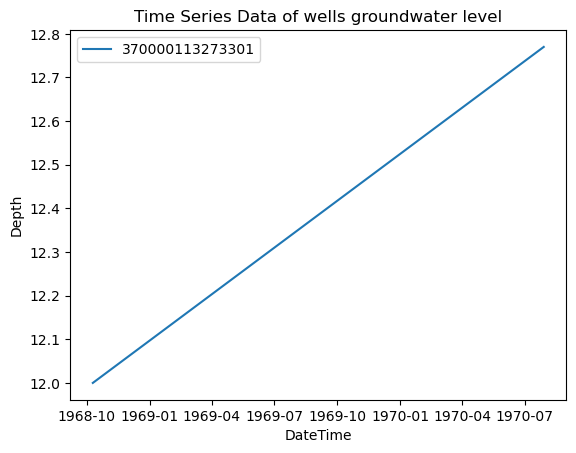

370006111300401
1992-03-30 00:00:00
2022-03-30 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


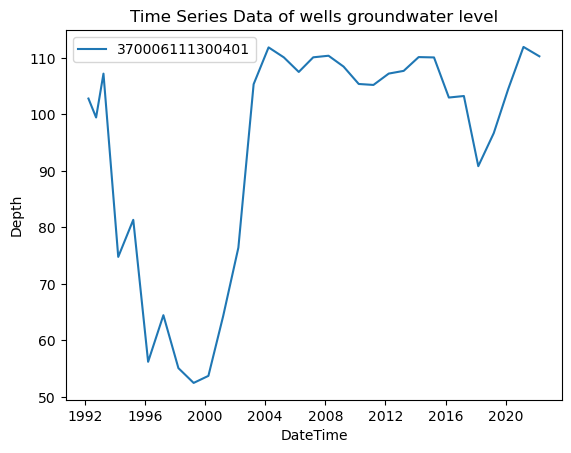

C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


370010111302501
1964-07-15 00:00:00
1990-03-17 00:00:00


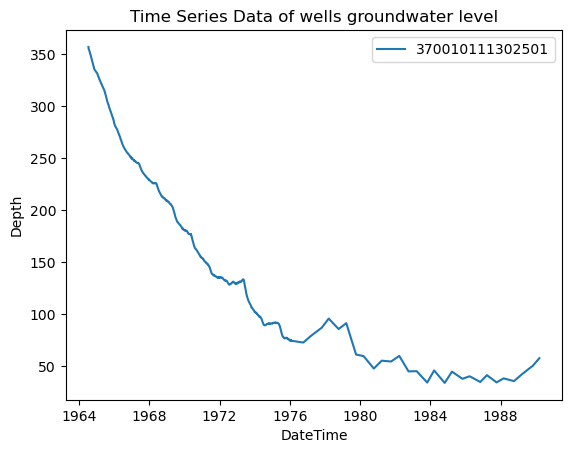

370021110174201
1996-08-26 00:00:00
1996-08-26 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


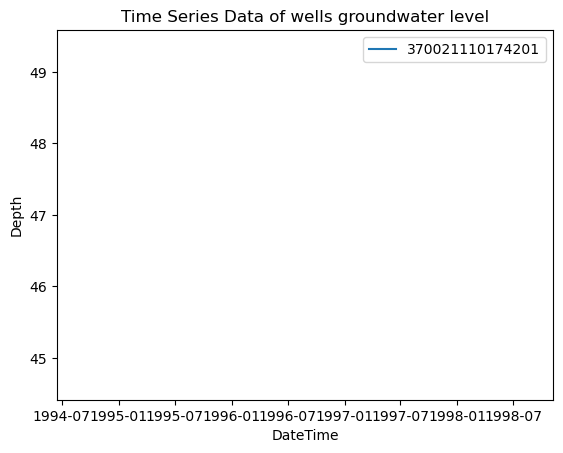

370026110173801
1996-08-26 00:00:00
1996-08-26 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


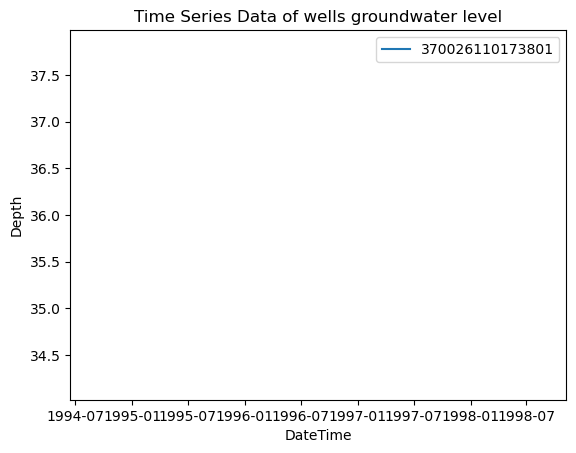

370034113290801
2005-02-24 00:00:00
2005-02-24 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


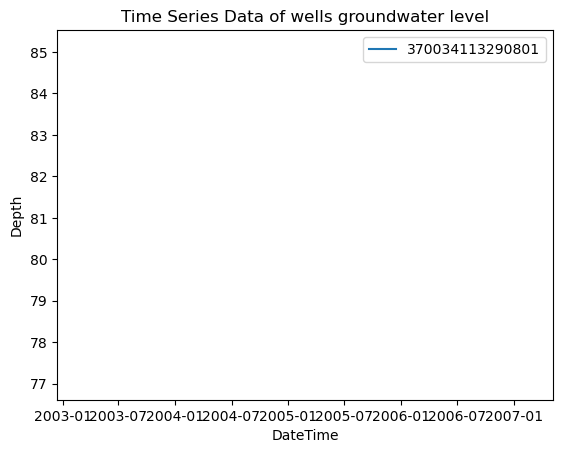

370037113281401
2003-02-24 00:00:00
2023-02-14 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


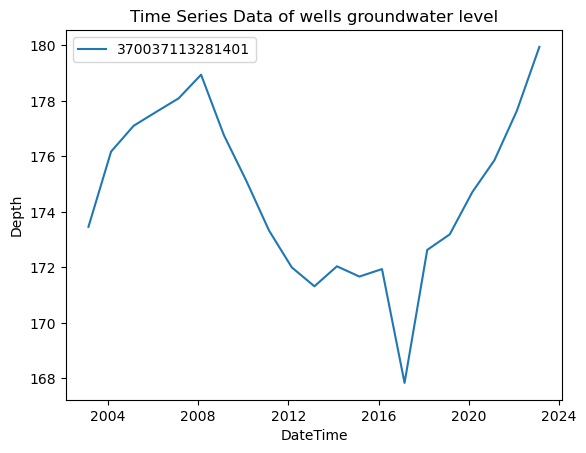

C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


370045113284201
1960-11-16 00:00:00
2001-02-27 00:00:00


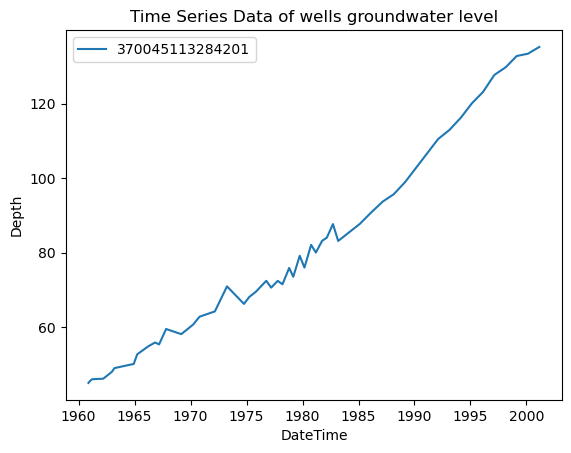

370050112274501
1935-09-10 00:00:00
2022-03-02 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


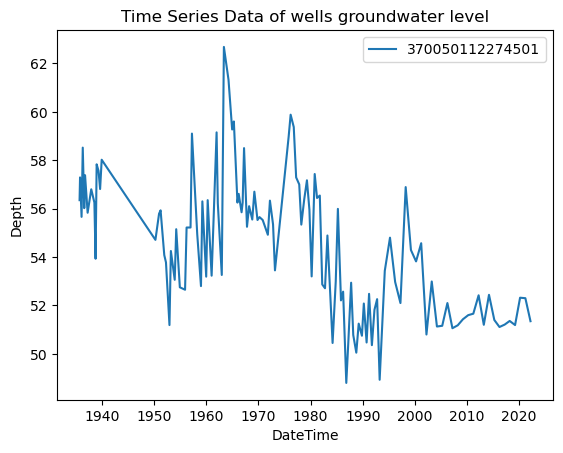

370120113555201
1994-02-26 00:00:00
1994-02-26 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


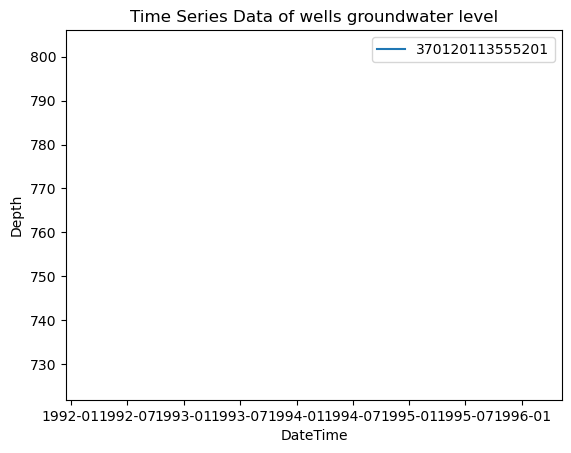

370125111360801
1963-10-10 00:00:00
1980-10-13 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


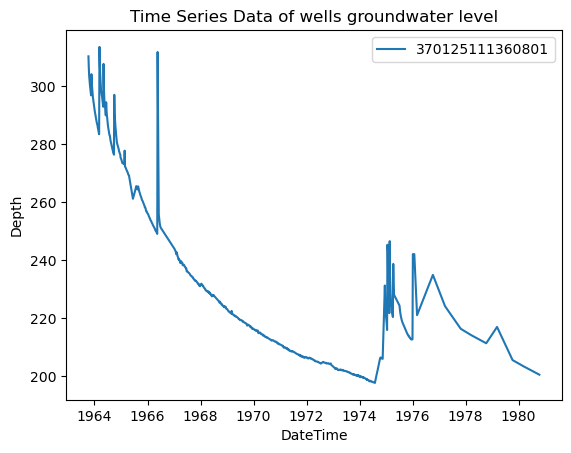

370125113290401
1984-03-28 00:00:00
2004-02-25 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


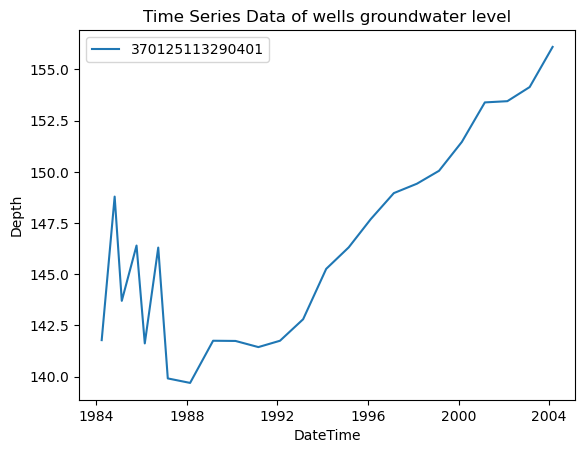

370140113192801
1962-09-21 00:00:00
1997-02-28 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


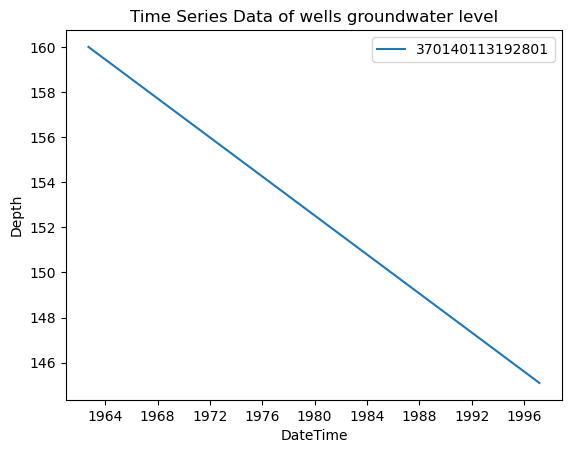

370147113373001
1966-01-16 00:00:00
1970-07-28 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


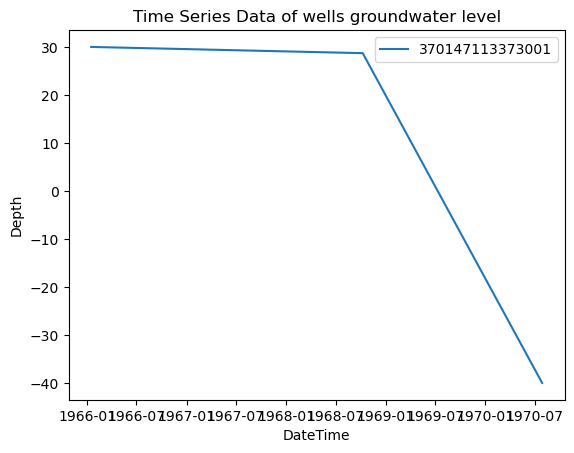

370154113595701
1958-02-06 00:00:00
1958-02-06 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


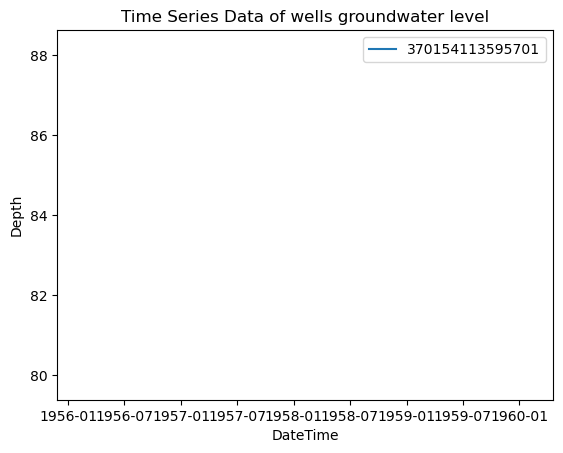

C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


370201113301701
1984-03-28 00:00:00
1986-09-26 00:00:00


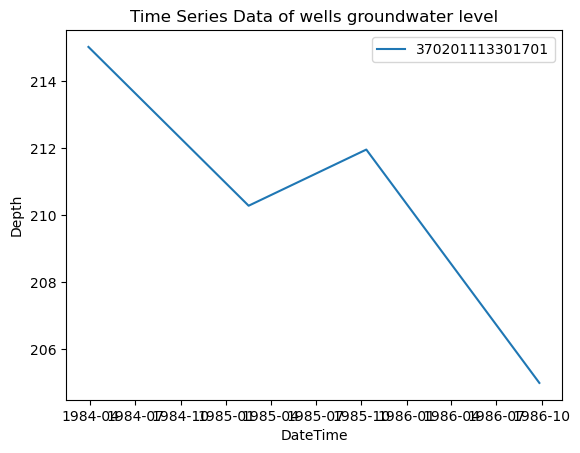

370204113310701
1972-05-25 00:00:00
1972-05-25 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


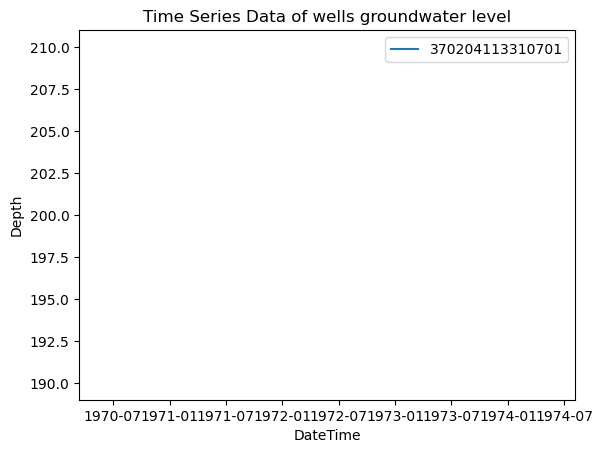

370207113370801
1966-01-08 00:00:00
1966-01-08 00:00:00


C:\Users\jihad\AppData\Local\Temp\ipykernel_12572\830023213.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])


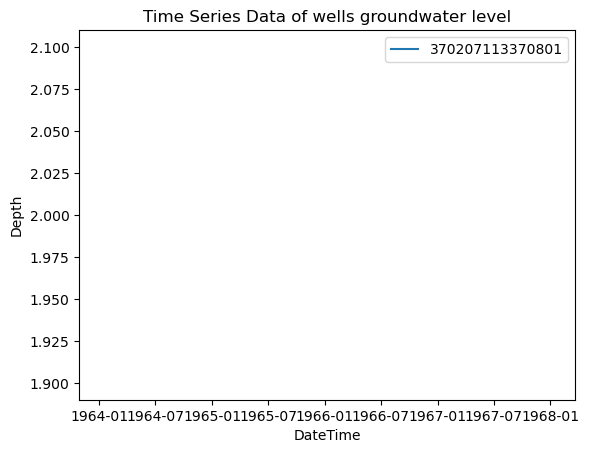

In [10]:
gwWellsDf = wellsDf[['site_tp_cd','lev_va','lev_dt']]
gwWellsDf = gwWellsDf.reset_index(drop=False)
gwWellsDf.set_index('site_no', inplace = True)



#creating new columns in the original table for start and end dates of recording
gwWellsDf['startdate'] = None
gwWellsDf['enddate'] = None

#creating new columns in the original table for start and end dates of recording
gwWellsDf['gwlevel_slope'] = None
gwWellsDf['gwlevel_slope_recent'] = None

#define the new columns as datetime
gwWellsDf['startdate']=pd.to_datetime(gwWellsDf['startdate'])
gwWellsDf['enddate']=pd.to_datetime(gwWellsDf['lev_dt'])


#creating new count columns in both tables: one for recent data above 100 measurements,
#another one for all data above 100 measurements
gwWellsDf['countno'] = None
gwWellsDf['recentcount'] = None
new_df['countno'] = None
new_df['recentcount'] = None
gwWellsDf.dropna(subset=['lev_va'], inplace=True)

for site_no in gwWellsDf.index.unique():
    gwWellsSiteDf = gwWellsDf.loc[gwWellsDf.index == site_no]
    gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])
    start_date = gwWellsSiteDf['lev_dt'].min()
    end_date = gwWellsSiteDf['lev_dt'].max()
    print(site_no)
    print(start_date)
    print(end_date)
    gwWellsSiteDf=gwWellsSiteDf.sort_values(by='lev_dt', ascending=True)
    gwWellsSiteDf.set_index('lev_dt', inplace = True )
    gwWellsSiteDf.dropna(subset=['lev_va'], inplace=True)

    plt.plot(gwWellsSiteDf.index, gwWellsSiteDf['lev_va'], label=site_no)
    plt.legend()
    plt.xlabel('DateTime')
    plt.ylabel('Depth')
    plt.title('Time Series Data of wells groundwater level')
    plt.show()    

    num_obs = gwWellsSiteDf.shape[0]
    gwWellsDf.loc[site_no, 'startdate'] = start_date
    gwWellsDf.loc[site_no, 'enddate'] = end_date
    gwWellsDf.loc[site_no, 'countno'] = num_obs 
    
    
    
    gwWellsSiteDf = gwWellsSiteDf.loc['2010-01-01':]
    recent_num_obs = gwWellsSiteDf.shape[0]
    gwWellsDf.loc[site_no, 'recentcount'] = recent_num_obs
    

# #     slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(gwWellsSiteDf)), gwWellsSiteDf['lev_va'])
#     slope, intercept, r_value, p_value, std_err = linregress(gwWellsSiteDf.index,gwWellsSiteDf.lev_va)
#     if slope <0:
#         gwWellsDf.loc[site_no, 'gwlevel_slope_recent'] = 'decreasing'
#         else:
#             gwWellsDf.loc[site_no, 'gwlevel_slope_recent'] = 'increasing'
    
    
#dropping duplicates from the original dataframe gwWellsDf to be able to have a table of number of counts of each site
#     num_obs = gwWellsSiteDf.shape[0]    
#     gwWellsDf.loc[site_no, 'startdate'] = start_date
#     gwWellsDf.loc[site_no, 'enddate'] = end_date
#     gwWellsDf.loc[site_no, 'countno'] = num_obs  

In [11]:
gwWellsDf

,datetime,site_tp_cd,lev_va,lev_dt,startdate,enddate,gwlevel_slope,gwlevel_slope_recent,countno,recentcount
site_no,,,,,,,,,,
370000113273301,NaT,GW,12.00,1968-10-10,1968-10-10,1970-07-29,None,None,2,0
370000113273301,NaT,GW,12.77,1970-07-29,1968-10-10,1970-07-29,None,None,2,0
370006111300401,2007-03-14 14:39:00+00:00,GW,110.11,2007-03-14,1992-03-30,2022-03-30,None,None,32,13
370006111300401,2008-03-20 15:09:00+00:00,GW,110.39,2008-03-20,1992-03-30,2022-03-30,None,None,32,13
370006111300401,2010-03-24 14:53:00+00:00,GW,105.39,2010-03-24,1992-03-30,2022-03-30,None,None,32,13
...,...,...,...,...,...,...,...,...,...,...
370201113301701,NaT,GW,210.28,1985-02-15,1984-03-28,1986-09-26,None,None,4,0
370201113301701,NaT,GW,211.96,1985-10-11,1984-03-28,1986-09-26,None,None,4,0
370201113301701,NaT,GW,204.98,1986-09-26,1984-03-28,1986-09-26,None,None,4,0


In [12]:
# site_no='370006111300401'
# gwWellsSiteDf = gwWellsDf.loc[gwWellsDf.index == site_no]
# gwWellsSiteDf['lev_dt']=pd.to_datetime(gwWellsSiteDf['lev_dt'])
# start_date = gwWellsSiteDf['lev_dt'].min()
# end_date = gwWellsSiteDf['lev_dt'].max()
# print(site_no)
# print(start_date)
# print(end_date)

In [13]:
gwWellsSiteDf

,datetime,site_tp_cd,lev_va,startdate,enddate,gwlevel_slope,gwlevel_slope_recent,countno,recentcount
lev_dt,,,,,,,,,


In [14]:
gwWellsDf = gwWellsDf.reset_index(drop=False)
gwWellsDf.drop_duplicates(subset=['site_no'], keep='first', inplace = True)
gwWellsDf

,site_no,datetime,site_tp_cd,lev_va,lev_dt,startdate,enddate,gwlevel_slope,gwlevel_slope_recent,countno,recentcount
0,370000113273301,NaT,GW,12.00,1968-10-10,1968-10-10,1970-07-29,None,None,2,0
2,370006111300401,2007-03-14 14:39:00+00:00,GW,110.11,2007-03-14,1992-03-30,2022-03-30,None,None,32,13
34,370010111302501,NaT,GW,357.07,1964-07-15,1964-07-15,1990-03-17,None,None,807,0
841,370021110174201,NaT,GW,47.00,1996-08-26,1996-08-26,1996-08-26,None,None,1,0
842,370026110173801,NaT,GW,36.00,1996-08-26,1996-08-26,1996-08-26,None,None,1,0
843,370034113290801,NaT,GW,81.07,2005-02-24,2005-02-24,2005-02-24,None,None,1,0
844,370037113281401,2008-02-20 21:31:00+00:00,GW,178.94,2008-02-20,2003-02-24,2023-02-14,None,None,21,14
865,370045113284201,1997-02-20 19:15:00+00:00,GW,127.70,1997-02-20,1960-11-16,2001-02-27,None,None,50,0
915,370050112274501,1997-03-24 19:00:00+00:00,GW,52.10,1997-03-24,1935-09-10,2022-03-02,None,None,121,13
1036,370120113555201,NaT,GW,763.99,1994-02-26,1994-02-26,1994-02-26,None,None,1,0


In [15]:
new_df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,countno,recentcount
993,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,NNNNNNNN,N300COPLTS,310DCLL,U,120.0,120.0,R,474923900,None,None
994,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,YNNNNYNN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,None,None
995,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,YYYYNNNN,NaN,111ALVM,NaN,84.0,84.0,NaN,KAN,None,None
996,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,Y Y,NaN,227GLNC,X,NaN,NaN,NaN,971600203,None,None
1000,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,YYNNNYNN,NaN,NaN,NaN,800.0,800.0,D,464900200,None,None
1001,USGS,370010113002001,(C-43-10)32dca-1,GW,370010.0,1130020.0,37.002778,-113.005556,U,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018PSSWUD,None,None
1003,USGS,370017113002001,(C-43-10)32dba-1,GW,370017.0,1130020.0,37.004722,-113.005556,U,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018PSSWUD,None,None
1006,USGS,370021110174201,(D-43-15)31acc- 1,GW,370021.0,1101742.0,37.005833,-110.295688,M,S,...,YNNNNNNN,NaN,310DCLL,U,225.0,225.0,O,474923900,None,None
1008,USGS,370026110173801,(D-43-15)31aca- 1,GW,370026.0,1101738.0,37.007222,-110.294576,M,S,...,YYNYNNNN,NaN,111ALVM,U,50.0,60.0,D,474923900,None,None
1011,USGS,370033111374701,(D-44- 3) 6cac-1,GW,370033.0,1113747.0,37.009167,-111.629722,U,U,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018PSSWUD,None,None


In [16]:
#merging the 2 tables to obtain only one table with count number
merged_df = pd.merge(new_df, gwWellsDf[['site_no', 'countno','startdate','enddate','recentcount', 'gwlevel_slope_recent']], on='site_no', how='left')
merged_df

merged_df['countno_x'].fillna(merged_df['countno_y'], inplace=True)
merged_df['countno_x'].fillna(0, inplace=True)

merged_df['recentcount_x'].fillna(merged_df['recentcount_y'], inplace=True)
merged_df['recentcount_x'].fillna(0, inplace=True)



merged_df['recentcount_x'] = merged_df['recentcount_x'].astype(int)

merged_df['countno_x'] = merged_df['countno_x'].astype(int)

merged_df.drop(columns=['countno_y'], inplace=True)
merged_df.rename(columns={'countno_x': 'count'}, inplace=True)



merged_df.drop(columns=['recentcount_y'], inplace=True)
merged_df.rename(columns={'recentcount_x': 'recentcount'}, inplace=True)


merged_df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no,count,recentcount,startdate,enddate,gwlevel_slope_recent
0,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,U,120.0,120.0,R,474923900,0,0,NaT,NaT,NaN
1,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,NaN,14.0,NaN,NaN,NaN,2,0,1968-10-10,1970-07-29,None
2,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,NaN,84.0,84.0,NaN,KAN,0,0,NaT,NaT,NaN
3,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,X,NaN,NaN,NaN,971600203,32,13,1992-03-30,2022-03-30,None
4,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,NaN,800.0,800.0,D,464900200,807,0,1964-07-15,1990-03-17,None
5,USGS,370010113002001,(C-43-10)32dca-1,GW,370010.0,1130020.0,37.002778,-113.005556,U,U,...,NaN,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN
6,USGS,370017113002001,(C-43-10)32dba-1,GW,370017.0,1130020.0,37.004722,-113.005556,U,U,...,NaN,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN
7,USGS,370021110174201,(D-43-15)31acc- 1,GW,370021.0,1101742.0,37.005833,-110.295688,M,S,...,U,225.0,225.0,O,474923900,1,0,1996-08-26,1996-08-26,None
8,USGS,370026110173801,(D-43-15)31aca- 1,GW,370026.0,1101738.0,37.007222,-110.294576,M,S,...,U,50.0,60.0,D,474923900,1,0,1996-08-26,1996-08-26,None
9,USGS,370033111374701,(D-44- 3) 6cac-1,GW,370033.0,1113747.0,37.009167,-111.629722,U,U,...,NaN,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN


In [17]:
merged_df['color']=None
color_mapper = lambda x: 'blue' if x == 'C' else 'red'
merged_df['color'] = merged_df['aqfr_type_cd'].apply(color_mapper)
merged_df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,well_depth_va,hole_depth_va,depth_src_cd,project_no,count,recentcount,startdate,enddate,gwlevel_slope_recent,color
0,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,120.0,120.0,R,474923900,0,0,NaT,NaT,NaN,red
1,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,14.0,NaN,NaN,NaN,2,0,1968-10-10,1970-07-29,None,red
2,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,84.0,84.0,NaN,KAN,0,0,NaT,NaT,NaN,red
3,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,NaN,NaN,NaN,971600203,32,13,1992-03-30,2022-03-30,None,red
4,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,800.0,800.0,D,464900200,807,0,1964-07-15,1990-03-17,None,red
5,USGS,370010113002001,(C-43-10)32dca-1,GW,370010.0,1130020.0,37.002778,-113.005556,U,U,...,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red
6,USGS,370017113002001,(C-43-10)32dba-1,GW,370017.0,1130020.0,37.004722,-113.005556,U,U,...,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red
7,USGS,370021110174201,(D-43-15)31acc- 1,GW,370021.0,1101742.0,37.005833,-110.295688,M,S,...,225.0,225.0,O,474923900,1,0,1996-08-26,1996-08-26,None,red
8,USGS,370026110173801,(D-43-15)31aca- 1,GW,370026.0,1101738.0,37.007222,-110.294576,M,S,...,50.0,60.0,D,474923900,1,0,1996-08-26,1996-08-26,None,red
9,USGS,370033111374701,(D-44- 3) 6cac-1,GW,370033.0,1113747.0,37.009167,-111.629722,U,U,...,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red


In [18]:
#subsetting the data of count above 100
df100 = merged_df[merged_df['count'] > 100]
df100


recentdf100 = merged_df[merged_df['recentcount'] > 100]
recentdf100

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,well_depth_va,hole_depth_va,depth_src_cd,project_no,count,recentcount,startdate,enddate,gwlevel_slope_recent,color


In [19]:
# map = folium.Map(location=[39.25, -111.45], zoom_start=8)
# for index, row in df100.iterrows():
#     folium.Marker(location=[row['dec_lat_va'], row['dec_long_va']], 
#                   popup=row['site_no']).add_to(map)
# map

In [20]:
# map = folium.Map(location=[39.25, -111.45], zoom_start=8)
# for index, row in df100.iterrows():
#     folium.CircleMarker(location=[row['dec_lat_va'], row['dec_long_va']],radius=row['count']*1000000, color='blue', fill=True, fill_color='red')
# map

map = folium.Map(location=[39.25, -111.45], zoom_start=8)
for index, row in df100.iterrows():
    folium.CircleMarker(location=[row['dec_lat_va'], row['dec_long_va']],radius=row['count']/50, color=row['color'], fill=True, fill_color=row['color'], popup=row['site_no']).add_to(map)
map


In [21]:
merged_df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,well_depth_va,hole_depth_va,depth_src_cd,project_no,count,recentcount,startdate,enddate,gwlevel_slope_recent,color
0,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,120.0,120.0,R,474923900,0,0,NaT,NaT,NaN,red
1,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,14.0,NaN,NaN,NaN,2,0,1968-10-10,1970-07-29,None,red
2,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,84.0,84.0,NaN,KAN,0,0,NaT,NaT,NaN,red
3,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,NaN,NaN,NaN,971600203,32,13,1992-03-30,2022-03-30,None,red
4,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,800.0,800.0,D,464900200,807,0,1964-07-15,1990-03-17,None,red
5,USGS,370010113002001,(C-43-10)32dca-1,GW,370010.0,1130020.0,37.002778,-113.005556,U,U,...,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red
6,USGS,370017113002001,(C-43-10)32dba-1,GW,370017.0,1130020.0,37.004722,-113.005556,U,U,...,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red
7,USGS,370021110174201,(D-43-15)31acc- 1,GW,370021.0,1101742.0,37.005833,-110.295688,M,S,...,225.0,225.0,O,474923900,1,0,1996-08-26,1996-08-26,None,red
8,USGS,370026110173801,(D-43-15)31aca- 1,GW,370026.0,1101738.0,37.007222,-110.294576,M,S,...,50.0,60.0,D,474923900,1,0,1996-08-26,1996-08-26,None,red
9,USGS,370033111374701,(D-44- 3) 6cac-1,GW,370033.0,1113747.0,37.009167,-111.629722,U,U,...,NaN,NaN,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red


In [22]:
# dont forget that wells with no data has no NA start and end dates

In [26]:
import pandas as pd
import geopandas as gpd

# read in well dataframe as a pandas DataFrame
#wells = pd.read_csv('path/to/well/data.csv')

# convert well dataframe to a GeoDataFrame by creating a Point geometry column
wells = gpd.GeoDataFrame(
    merged_df, 
    geometry=gpd.points_from_xy(merged_df.dec_long_va, merged_df.dec_lat_va),
    crs='EPSG:4326' # specify the coordinate reference system of the points
)

# read in landuse shapefile as a GeoDataFrame
landuse = gpd.read_file(r'C:\Users\jihad\Desktop\jihad\hydroteam\Utah_Water_Related_Land_Use\WaterRelatedLandUse.shp')

# specify the column name that contains the landuse information
landuse_column_name = 'Landuse'

# perform a spatial join between the well GeoDataFrame and the landuse GeoDataFrame, using the specified landuse column
joined = gpd.sjoin(wells, landuse[[landuse_column_name, 'geometry']], op='within')

# create a new column in the well dataframe indicating the landuse of the polygon each well belongs to
wells['landuse'] = joined[landuse_column_name]
wells

#wells.to_csv('')


C:\Users\jihad\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3377: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,depth_src_cd,project_no,count,recentcount,startdate,enddate,gwlevel_slope_recent,color,geometry,landuse
0,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,R,474923900,0,0,NaT,NaT,NaN,red,POINT (-110.27652 36.99833),Urban
1,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,NaN,NaN,2,0,1968-10-10,1970-07-29,None,red,POINT (-113.45995 36.99998),NaN
2,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,NaN,KAN,0,0,NaT,NaT,NaN,red,POINT (-112.96716 37.00026),NaN
3,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,NaN,971600203,32,13,1992-03-30,2022-03-30,None,red,POINT (-111.50183 37.00165),NaN
4,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,D,464900200,807,0,1964-07-15,1990-03-17,None,red,POINT (-111.50766 37.00276),NaN
5,USGS,370010113002001,(C-43-10)32dca-1,GW,370010.0,1130020.0,37.002778,-113.005556,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red,POINT (-113.00556 37.00278),Urban
6,USGS,370017113002001,(C-43-10)32dba-1,GW,370017.0,1130020.0,37.004722,-113.005556,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red,POINT (-113.00556 37.00472),Urban
7,USGS,370021110174201,(D-43-15)31acc- 1,GW,370021.0,1101742.0,37.005833,-110.295688,M,S,...,O,474923900,1,0,1996-08-26,1996-08-26,None,red,POINT (-110.29569 37.00583),NaN
8,USGS,370026110173801,(D-43-15)31aca- 1,GW,370026.0,1101738.0,37.007222,-110.294576,M,S,...,D,474923900,1,0,1996-08-26,1996-08-26,None,red,POINT (-110.29458 37.00722),NaN
9,USGS,370033111374701,(D-44- 3) 6cac-1,GW,370033.0,1113747.0,37.009167,-111.629722,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red,POINT (-111.62972 37.00917),NaN


In [30]:
def landcolor(x):
    if x == 'Agricultural':
        coloruse='green'
    elif x == 'Urban':
        coloruse='blue'
    else:
        coloruse='grey'
    return coloruse
merged_df['color'] = merged_df['landuse'].apply(landcolor)
merged_df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,depth_src_cd,project_no,count,recentcount,startdate,enddate,gwlevel_slope_recent,color,geometry,landuse
0,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,R,474923900,0,0,NaT,NaT,NaN,blue,POINT (-110.27652 36.99833),Urban
1,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,NaN,NaN,2,0,1968-10-10,1970-07-29,None,grey,POINT (-113.45995 36.99998),NaN
2,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,NaN,KAN,0,0,NaT,NaT,NaN,grey,POINT (-112.96716 37.00026),NaN
3,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,NaN,971600203,32,13,1992-03-30,2022-03-30,None,grey,POINT (-111.50183 37.00165),NaN
4,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,D,464900200,807,0,1964-07-15,1990-03-17,None,grey,POINT (-111.50766 37.00276),NaN
5,USGS,370010113002001,(C-43-10)32dca-1,GW,370010.0,1130020.0,37.002778,-113.005556,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,blue,POINT (-113.00556 37.00278),Urban
6,USGS,370017113002001,(C-43-10)32dba-1,GW,370017.0,1130020.0,37.004722,-113.005556,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,blue,POINT (-113.00556 37.00472),Urban
7,USGS,370021110174201,(D-43-15)31acc- 1,GW,370021.0,1101742.0,37.005833,-110.295688,M,S,...,O,474923900,1,0,1996-08-26,1996-08-26,None,grey,POINT (-110.29569 37.00583),NaN
8,USGS,370026110173801,(D-43-15)31aca- 1,GW,370026.0,1101738.0,37.007222,-110.294576,M,S,...,D,474923900,1,0,1996-08-26,1996-08-26,None,grey,POINT (-110.29458 37.00722),NaN
9,USGS,370033111374701,(D-44- 3) 6cac-1,GW,370033.0,1113747.0,37.009167,-111.629722,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,grey,POINT (-111.62972 37.00917),NaN


In [27]:
# merged_df['color']=None 
# color_mapper = lambda x: 'green' if x == 'Agricultural' else 'red'
# merged_df['color'] = merged_df['landuse'].apply(color_mapper)
# merged_df

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,depth_src_cd,project_no,count,recentcount,startdate,enddate,gwlevel_slope_recent,color,geometry,landuse
0,USGS,365954110163301,(D-43-15)32dcd- 1,GW,365954.0,1101633.0,36.998334,-110.276521,M,S,...,R,474923900,0,0,NaT,NaT,NaN,red,POINT (-110.27652 36.99833),Urban
1,USGS,370000113273301,(C-43-14)31ddd- 1,GW,370000.0,1132733.0,36.999983,-113.459952,M,F,...,NaN,NaN,2,0,1968-10-10,1970-07-29,None,red,POINT (-113.45995 36.99998),NaN
2,USGS,370001112575901,B-42-06 32BDB,GW,370001.0,1125759.0,37.000262,-112.967159,M,S,...,NaN,KAN,0,0,NaT,NaT,NaN,red,POINT (-112.96716 37.00026),NaN
3,USGS,370006111300401,(D-44- 4) 8bac- 1,GW,370006.0,1113004.0,37.001654,-111.501827,M,S,...,NaN,971600203,32,13,1992-03-30,2022-03-30,None,red,POINT (-111.50183 37.00165),NaN
4,USGS,370010111302501,(D-44- 4) 7aab- 1,GW,370010.0,1113025.0,37.002765,-111.507661,M,F,...,D,464900200,807,0,1964-07-15,1990-03-17,None,red,POINT (-111.50766 37.00276),NaN
5,USGS,370010113002001,(C-43-10)32dca-1,GW,370010.0,1130020.0,37.002778,-113.005556,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red,POINT (-113.00556 37.00278),Urban
6,USGS,370017113002001,(C-43-10)32dba-1,GW,370017.0,1130020.0,37.004722,-113.005556,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red,POINT (-113.00556 37.00472),Urban
7,USGS,370021110174201,(D-43-15)31acc- 1,GW,370021.0,1101742.0,37.005833,-110.295688,M,S,...,O,474923900,1,0,1996-08-26,1996-08-26,None,red,POINT (-110.29569 37.00583),NaN
8,USGS,370026110173801,(D-43-15)31aca- 1,GW,370026.0,1101738.0,37.007222,-110.294576,M,S,...,D,474923900,1,0,1996-08-26,1996-08-26,None,red,POINT (-110.29458 37.00722),NaN
9,USGS,370033111374701,(D-44- 3) 6cac-1,GW,370033.0,1113747.0,37.009167,-111.629722,U,U,...,NaN,2018PSSWUD,0,0,NaT,NaT,NaN,red,POINT (-111.62972 37.00917),NaN


In [32]:
map = folium.Map(location=[39.25, -111.45], zoom_start=8)
for index, row in merged_df.iterrows():
    folium.CircleMarker(location=[row['dec_lat_va'], row['dec_long_va']],radius=row['count']/50, color=row['color'], fill=True, fill_color=row['color'], popup=row['site_no']).add_to(map)
map